# Exploratory Data Analysis in Python

A predictive model is only as good as the data it is built upon. This is why it is essential you carry out data cleaning steps such as we have seen in the previous two modules. But even if you have the cleanest data possible you are still going to have to explore the data to understand what is going on. While machine learning algorithms have the potential to transform our data analysis, they are not all powerful. You need to understand patterns within the data to get an idea of what will be useful in building the model.

In this notebook we will explore some techniques you can use when investigating your data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Throughout this Activate we will be using the college data we saw in module 8 to build a model which predicts graduate rates. You can read the documentation <a href='https://www.kaggle.com/datasets/yashgpt/us-college-data'>here</a> if you have forgotten what the fields are.

In [2]:
college=pd.read_csv('college_data.csv')
college.head()

College Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

## Skew

In the previous module we learned how to identify the distribution of a dataset and check if it is skewed or not. Like with many of the hypothesis tests, predictive models often require that the data being used is normally distributed. This is because the skew of the data can influence the predictions a model makes. A model is only as good as the data it is built upon, and if the data is heavily skewed to one side the model will learn to favour that side as well when making predictions. 

Let's check the distribution of the graduate rate column:

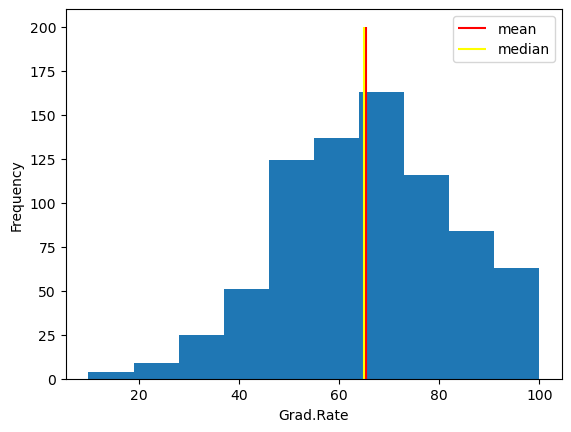

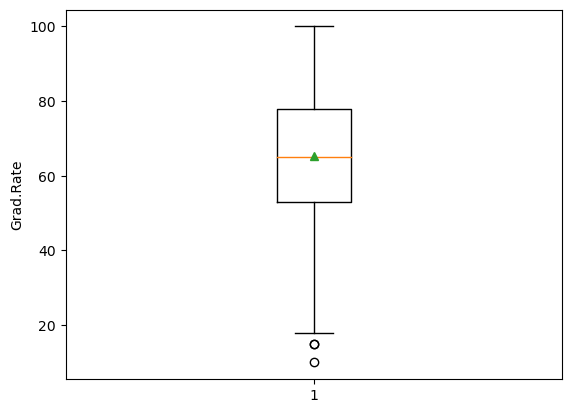

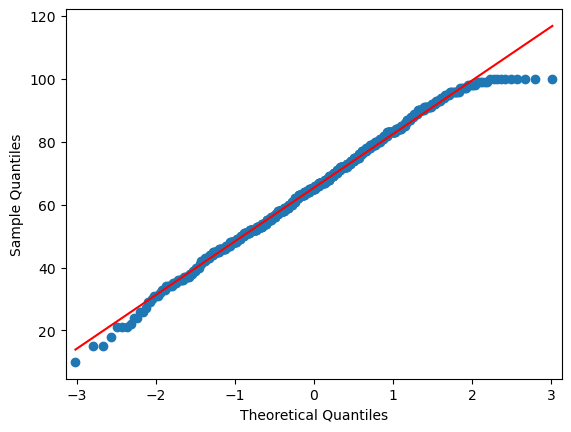

In [3]:
from statsmodels.graphics.gofplots import qqplot

grad = college['Grad.Rate']

plt.hist(grad)
plt.vlines(grad.mean(), ymin=0, ymax=200, color='red', label='mean')
plt.vlines(grad.median(), ymin=0, ymax=200, color='yellow', label='median')
plt.legend()
plt.xlabel('Grad.Rate')
plt.ylabel('Frequency')
plt.show()

plt.figure()
plt.boxplot(grad, showmeans=True)
plt.ylabel('Grad.Rate')

qqplot(grad, line='s')
plt.show()

The data seems to be normally distributed, we can check this further using a hypothesis test:

Null: The data is normally distributed<br>
Alternate: The data is not normally distributed

Check at 5% level

In [4]:
# D'Agostino's K^2 Test

from scipy.stats import normaltest

stat, p = normaltest(college['Grad.Rate'])
print(p)

0.07259743682937793


In this case we have insufficient evidence to reject the null hypothesis and conclude that our target feature is normally distributed.

It is isn't necessarily a problem if the target feature is skewed, as the model will adapt to it, but it can create issues later when trying to use the model for prediction. A potential solution can be to transform your data which you can read about <a href='https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/'>here</a>.

## Correlation

In module 8 we saw how to investigate if there is a correlation (relationship) between two variables, but how is it used in predictive modelling? If we are trying to predict something like a success rate or number of sales then using a variable we know has a strong correlation with the target is a good starting point. 

Using our college data we are going to (eventually) build a model that predicts graduation rate, but before we can do that we would like to see which of the other features are going to be useful in building our prediction by looking at correlations.

For example, let's investigate the correlation between graduation rate and the college's expenditure:

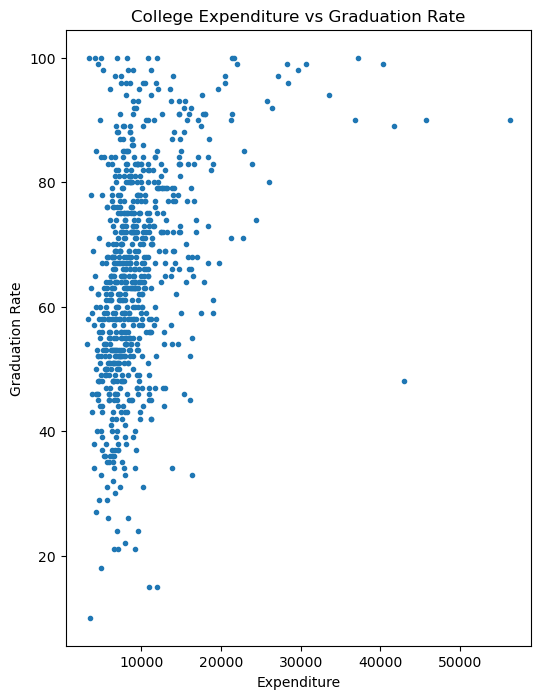

In [5]:
# Scatter Plot

fig, ax = plt.subplots(figsize=(6, 8))
ax.plot(college.Expend, college['Grad.Rate'], '.')
ax.set_title('College Expenditure vs Graduation Rate')
ax.set_xlabel('Expenditure')
ax.set_ylabel('Graduation Rate')
plt.show()

In [6]:
# Pandas has a function that calculates correlation coefficients 
college['Expend'].corr(college['Grad.Rate'])

0.39424852573560065

The correlation between expenditure and correlation is 0.39, indicating a weak positive relationship between the two features. But what about the other information in the data? It will be tedious to perform these steps for each possible predictive feature. This is where a correlation matrix comes in.

In [8]:
college.corr(numeric_only = True)

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943520  0.846965   0.339383   0.352197     0.814834   
Accept       0.943520  1.000000  0.912079   0.193410   0.248488     0.874998   
Enroll       0.846965  0.912079  1.000000   0.181062   0.226548     0.964682   
Top10perc    0.339383  0.193410  0.181062   1.000000   0.891841     0.140664   
Top25perc    0.352197  0.248488  0.226548   0.891841   1.000000     0.198874   
F.Undergrad  0.814834  0.874998  0.964682   0.140664   0.198874     1.000000   
P.Undergrad  0.398512  0.441865  0.513000  -0.106205  -0.054377     0.570342   
Outstate     0.050237 -0.025566 -0.155584   0.562401   0.489408    -0.215982   
Room.Board   0.164841  0.090602 -0.040084   0.372390   0.332364    -0.068598   
Books        0.132484  0.113328  0.112831   0.119367   0.116032     0.115799   
Personal     0.179265  0.202158  0.280786  -0.095164  -0.082634     0.316689   
PhD          0.394039  0.360390  0.332466   0.531303   0.545442     0.318162   
Terminal     0.371313  0.340395  0.308492   0.490031   0.523781     0.299443   
S.F.Ratio    0.095621  0.176228  0.237302  -0.385078  -0.294767     0.279797   
perc.alumni -0.090169 -0.159864 -0.180886   0.455524   0.417875    -0.229674   
Expend       0.259730  0.125035  0.064046   0.660935   0.527361     0.018388   
Grad.Rate    0.146786  0.065446 -0.021397   0.502540   0.484702    -0.077066   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398512  0.050237    0.164841  0.132484  0.179265  0.394039   
Accept          0.441865 -0.025566    0.090602  0.113328  0.202158  0.360390   
Enroll          0.513000 -0.155584   -0.040084  0.112831  0.280786  0.332466   
Top10perc      -0.106205  0.562401    0.372390  0.119367 -0.095164  0.531303   
Top25perc      -0.054377  0.489408    0.332364  0.116032 -0.082634  0.545442   
F.Undergrad     0.570342 -0.215982   -0.068598  0.115799  0.316689  0.318162   
P.Undergrad     1.000000 -0.253762   -0.061031  0.081440  0.319375  0.147847   
Outstate       -0.253762  1.000000    0.654516  0.038963 -0.299819  0.384342   
Room.Board     -0.061031  0.654516    1.000000  0.127813 -0.198946  0.333080   
Books           0.081440  0.038963    0.127813  1.000000  0.179976  0.028311   
Personal        0.319375 -0.299819   -0.198946  0.179976  1.000000 -0.016022   
PhD             0.147847  0.384342    0.333080  0.028311 -0.016022  1.000000   
Terminal        0.140793  0.408551    0.377050  0.101162 -0.034315  0.848671   
S.F.Ratio       0.232615 -0.554829   -0.362704 -0.031952  0.136566 -0.131135   
perc.alumni    -0.281015  0.566230    0.272532 -0.040124 -0.286617  0.249686   
Expend         -0.083861  0.672742    0.502061  0.112575 -0.098601  0.434000   
Grad.Rate      -0.256418  0.575838    0.425836 -0.000150 -0.266320  0.321215   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.371313   0.095621    -0.090169  0.259730   0.146786  
Accept       0.340395   0.176228    -0.159864  0.125035   0.065446  
Enroll       0.308492   0.237302    -0.180886  0.064046  -0.021397  
Top10perc    0.490031  -0.385078     0.455524  0.660935   0.502540  
Top25perc    0.523781  -0.294767     0.417875  0.527361   0.484702  
F.Undergrad  0.299443   0.279797    -0.229674  0.018388  -0.077066  
P.Undergrad  0.140793   0.232615    -0.281015 -0.083861  -0.256418  
Outstate     0.408551  -0.554829     0.566230  0.672742   0.575838  
Room.Board   0.377050  -0.362704     0.272532  0.502061   0.425836  
Books        0.101162  -0.031952    -0.040124  0.112575  -0.000150  
Personal    -0.034315   0.136566    -0.286617 -0.098601  -0.266320  
PhD          0.848671  -0.131135     0.249686  0.434000   0.321215  
Terminal     1.000000  -0.160464     0.267357  0.439162   0.301070  
S.F.Ratio   -0.160464   1.000000    -0.402927 -0.583861  -0.308790  
perc.alumni  0.267357  -0.402927     1.000000  0.417656   0.494782  
Expend       0.439162  -0.58386

A correlation matrix finds the correlation coefficient for each possible pairing within the dataset. The feature we want to predidct, graduation rate, is the bottom row, and we can see Top10perc (what % of students were from the top % of their high school class). However, reading a table full of numbers is a bit boring. With a bit of seaborn magic, we can turn this into a viz that shows the same information:

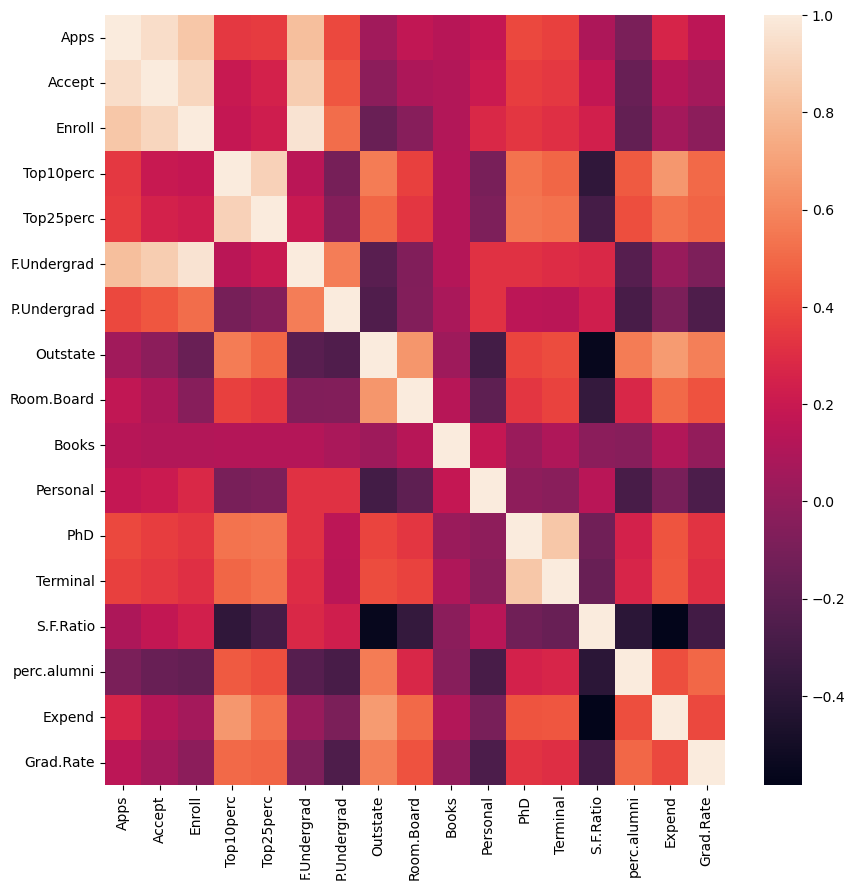

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(college.corr(numeric_only = True));

Darker boxes indicate stronger negative correlation while lighter boxes indicate stronger positive correlation. Looking at the bottom row (graduation rate) it appears Top10perc, Top25perc, Outstate, Expend and Room.Board may be the most useful features for predicting graduation rate.

However, just because two features are correlated doesn't mean it is actually useful. There are many examples of things which are correlated (show a relationship) but actually have nothing to do with each other (famous examples <a href='https://www.tylervigen.com/spurious-correlations'>here</a>). It is possible for two things to be correlated but not actually have a causal relationship.

Unfortunately, the data will not tell you this. You need to think about the correlation logically and check that the relationship makes sense. For example, there is a correlation between how much it costs to stay at the college (Room.Board) and its graduation rate but what does that actually mean? It is not going to be that if a college increases its accomodation costs the graduation rate goes up, but rather that college's which charge more for accomodation will have higher budgets and student support (which is not captured in this data). 

Something else we can use correlation matrices and heatmaps for is collinearity. This is when two predictive features have a high level of correlation between them. This creates an issue for a predictive model where these features will be predicting <b> each other </b> and not what you are actually trying to predict. If you spot two or more predictive features will high levels of collinearity, you should drop all but one for the actual model.

Another viz we can use to explore correlation and collinearity is a pairplot, which for each combination of variables creates a scatter plot. This will allow you to visually see where correlations occur. Note, this function can take a few minutes to run depending on the size of the dataset.

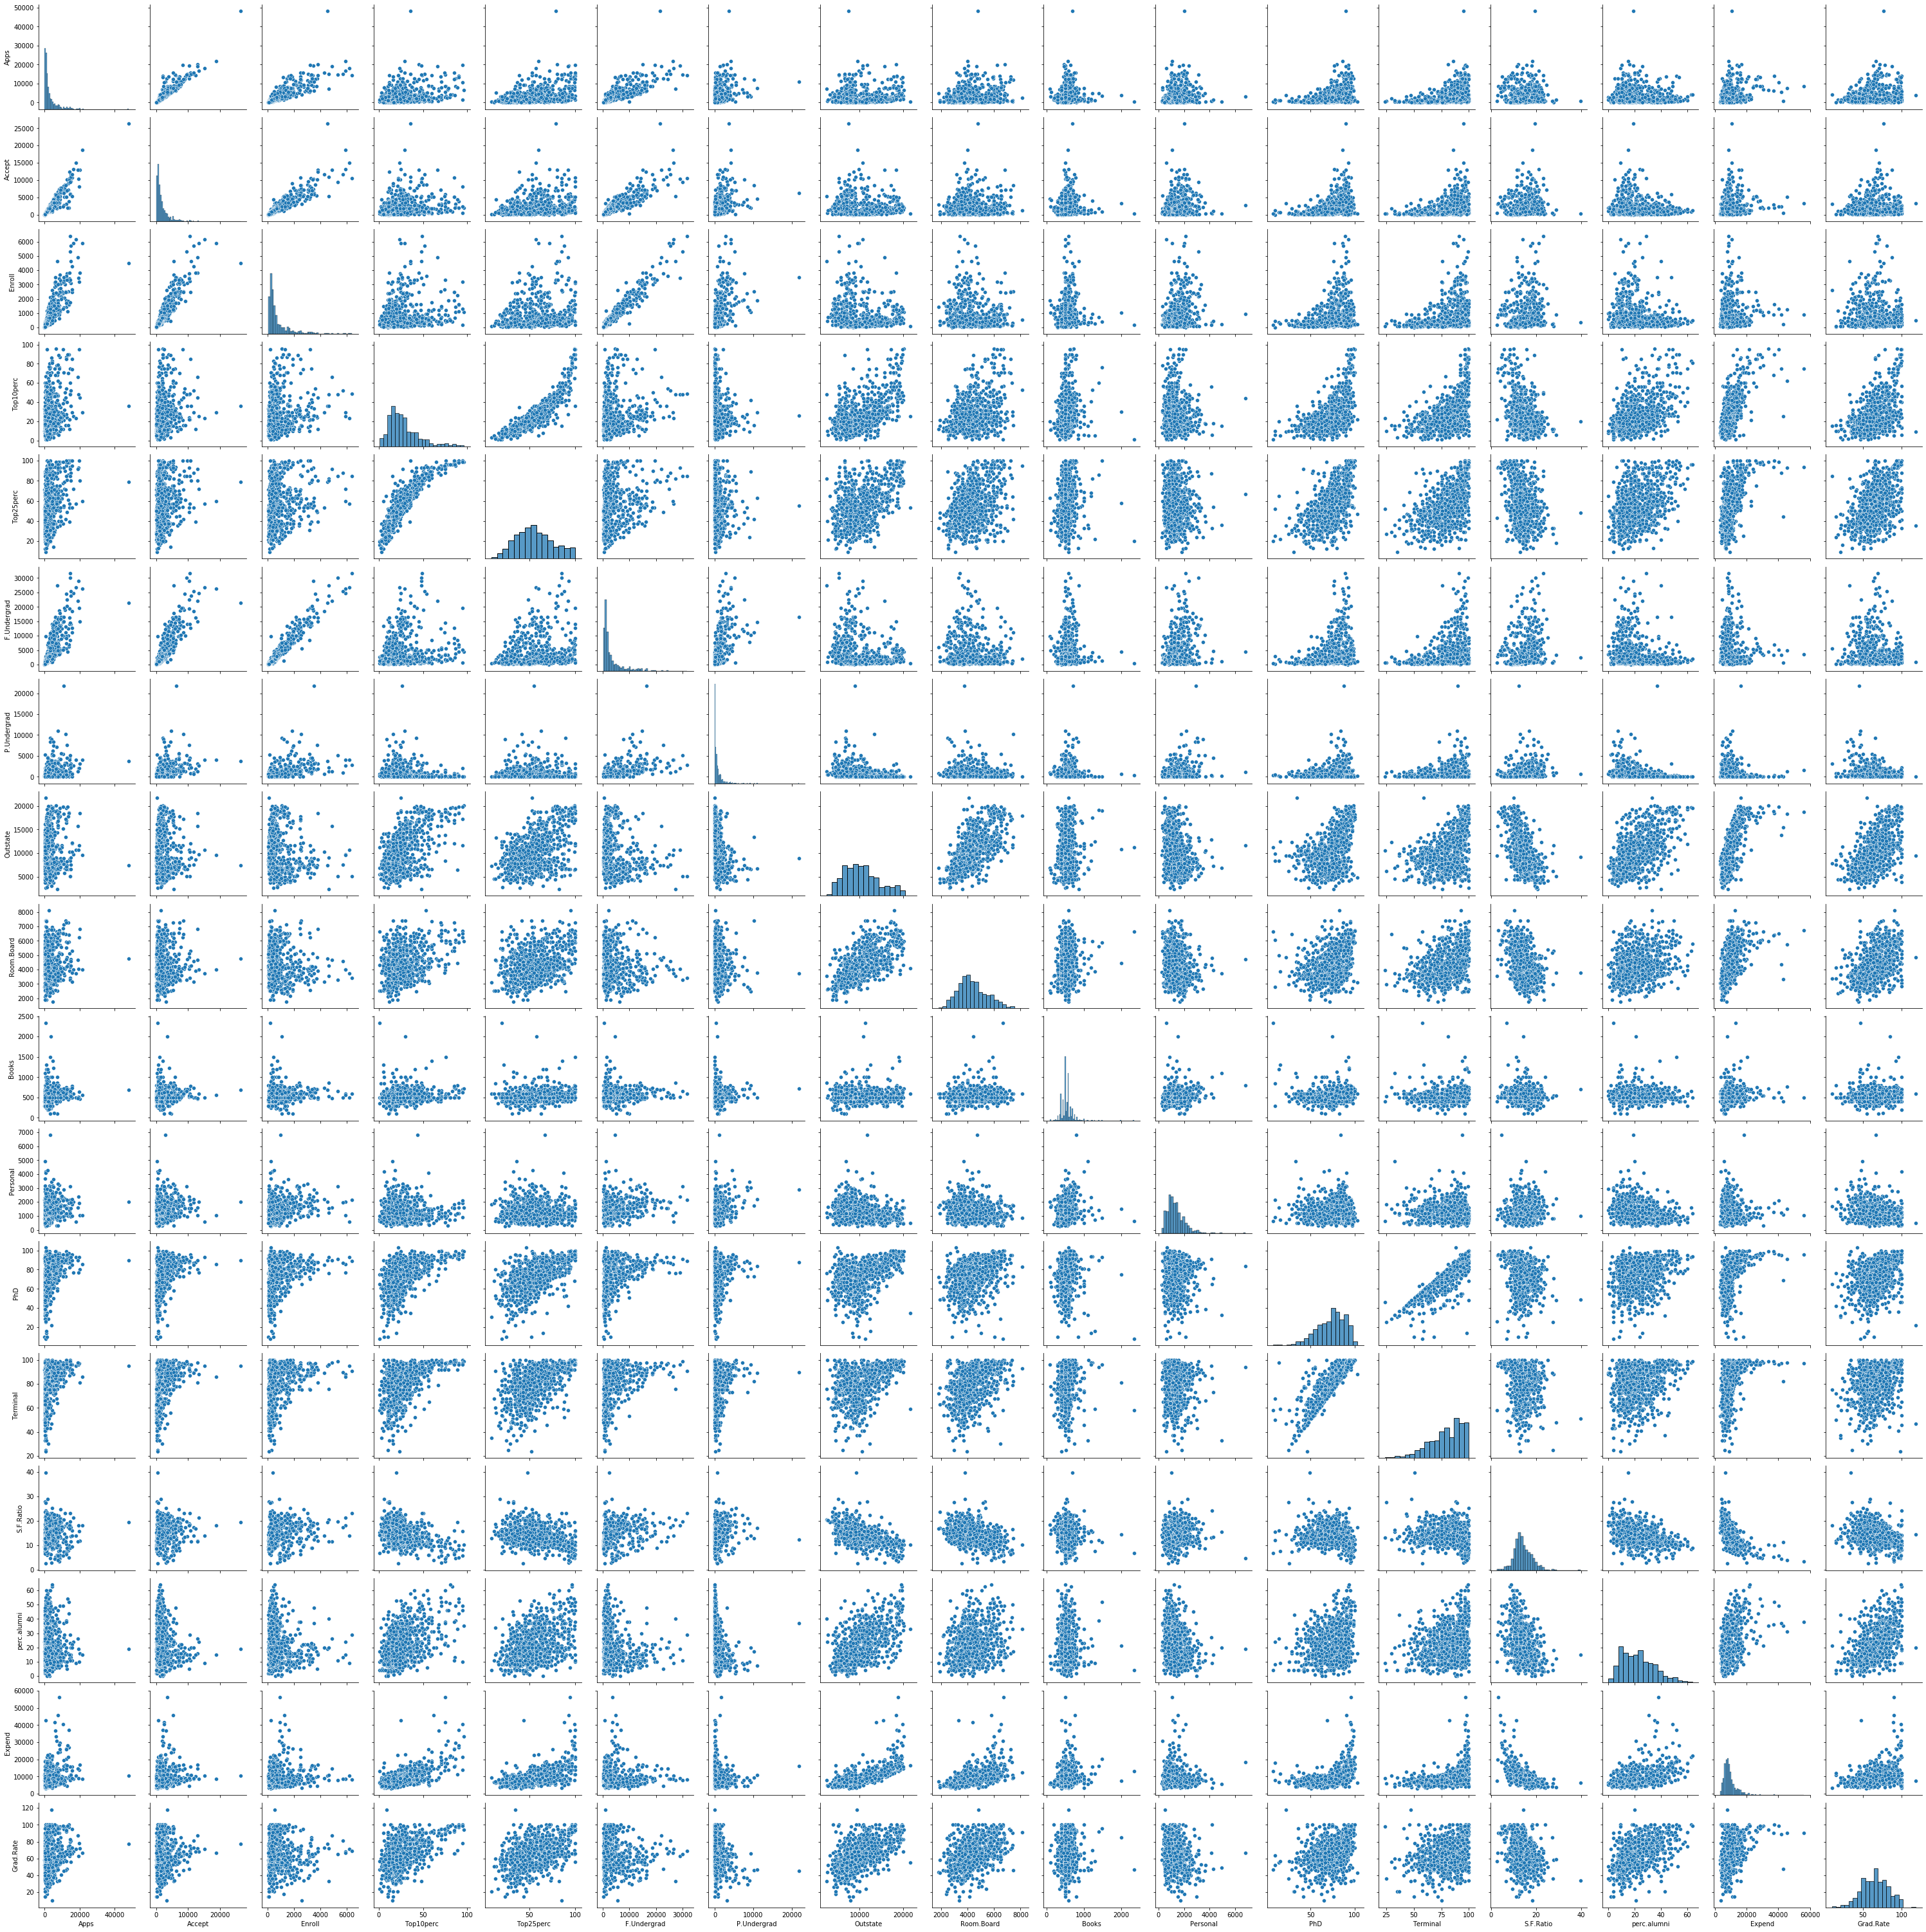

In [9]:
sns.pairplot(college)

# double click on the iz to enlarge.

## Summary Statistics

When evaluating how good a feature will be for prediction, it is useful to check out some of the summary statistics- specifically the standard deviation. Data that is more closely clustered together will perform better than data that is spread out.

We can calculate the standard deviation for each potential predictive feature individually, or we can visually inspect the distribution and spread using boxplots:

In [10]:
college.std(numeric_only = True)

Apps           3872.578376
Accept         2452.168020
Enroll          929.731001
Top10perc        17.639133
Top25perc        19.803448
F.Undergrad    4852.585693
P.Undergrad    1523.112196
Outstate       4025.431964
Room.Board     1097.266697
Books           165.201826
Personal        676.833991
PhD              16.236897
Terminal         14.684883
S.F.Ratio         3.960895
perc.alumni      12.399401
Expend         5224.659733
Grad.Rate        17.084743
dtype: float64

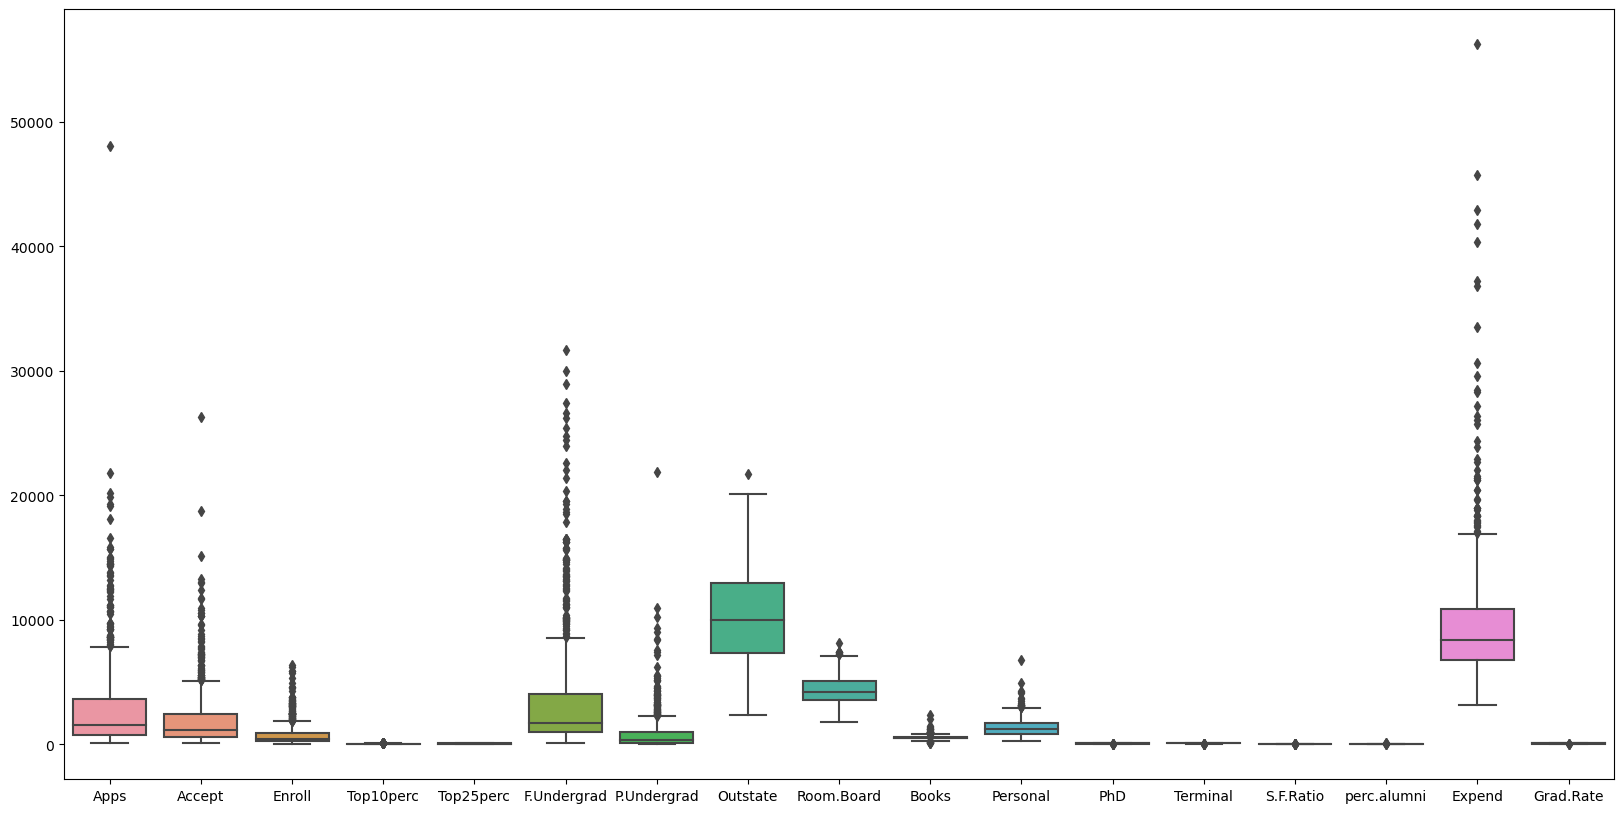

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(data=college);

Another advantage of this method is that it reveals outliers. Outliers within the predictors can influence the model, so it may be that you need to remove them. However, you need to investigate each outlier carefully as the result can be legitimate and should be included. Outliers should only be removed if they are clearly an error or have an overwhelming effect on your model.
 

## Dummy variables

The machine learning models we will be using in this module require that the predictive features are numeric, but what happens if you want to use something categorical? This is where we can use dummy variables. 

Let's look at an example, in our college data we have information on whether the college is private or not. The data is currently stored as "Yes" or "No" strings which is unusable in a model. However, it is not difficult to transform this feature so it is numeric- we can assign a value of 1 for yes and 0 for no:

In [12]:
pd.get_dummies(college.Private)

No  Yes
0     0    1
1     0    1
2     0    1
3     0    1
4     0    1
..   ..  ...
771   1    0
772   0    1
773   0    1
774   0    1
775   0    1

[776 rows x 2 columns]

So now instead of having one column filled with "Yes" and "No", we now have two columns- one indicating if it is private and one indicating if it is not private, but isn't that saying the same thing?

Yes.

There is no need for two columns as we can understand from just one column if the college is private or not. To save us space then we can add an argument to the function which drops the extra column:

In [13]:
pd.get_dummies(college.Private,drop_first=True)

Yes
0      1
1      1
2      1
3      1
4      1
..   ...
771    0
772    1
773    1
774    1
775    1

[776 rows x 1 columns]

We can then add this new column to our data:

Alternatively, we can build a new dataset with the dummies contained by adding the dataframe name to the function:

In [14]:
pd.get_dummies(college,columns=['Private'],drop_first=True)

College   Apps  Accept  Enroll  Top10perc  \
0      Abilene Christian University   1660    1232     721         23   
1                Adelphi University   2186    1924     512         16   
2                    Adrian College   1428    1097     336         22   
3               Agnes Scott College    417     349     137         60   
4         Alaska Pacific University    193     146      55         16   
..                              ...    ...     ...     ...        ...   
771         Worcester State College   2197    1515     543          4   
772               Xavier University   1959    1805     695         24   
773  Xavier University of Louisiana   2097    1915     695         34   
774                 Yale University  10705    2453    1317         95   
775    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
0           52         2885          537      7440        3300    450   
1           29         2683         1227     12280        6450    750   
2           50         1036           99     11250        3750    400   
3           89          510           63     12960        5450    450   
4           44          249          869      7560        4120    800   
..         ...          ...          ...       ...         ...    ...   
771         26         3089         2029      6797        3900    500   
772         47         2849         1107     11520        4960    600   
773         61         2793          166      6900        4200    617   
774         99         5217           83     19840        6510    630   
775         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  \
0        2200   70        78       18.1           12    7041         60   
1        1500   29        30       12.2           16   10527         56   
2        1165   53        66       12.9           30    8735         54   
3         875   92        97        7.7           37   19016         59   
4        1500   76        72       11.9            2   10922         15   
..        ...  ...       ...        ...          ...     ...        ...   
771      1200   60        60       21.0           14    4469         40   
772      1250   73        75       13.3           31    9189         83   
773       781   67        75       14.4           20    8323         49   
774      2115   96        96        5.8           49   40386         99   
775      1250   75        75       18.1           28    4509         99   

     Private_Yes  
0              1  
1              1  
2              1  
3              1  
4              1  
..           ...  
771            0  
772            1  
773            1  
774            1  
775            1  

[776 rows x 19 columns]

In this example the column we made into dummies only had two option, but you can do use this function on any column which has any number of options. However, you should not use it on columns with hundreds of different options such as names or id values. This will create a dataset where the number of features will outnumber the amount of data you have, which will invalidate any predictive model you make.

## Practice

Load, clean and explore the Ames house prices dataset (dataset has had some columns dropped, you can find the original <a href='https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data'>here</a> and check what the column names mean.

In [15]:
house_df=pd.read_csv('ames_houses.csv')
house_df.head()

SalePrice  LotFrontage  LotArea Utilities Neighborhood  YearBuilt  \
0     208500         65.0     8450    AllPub      CollgCr       2003   
1     181500         80.0     9600    AllPub      Veenker       1976   
2     223500         68.0    11250    AllPub      CollgCr       2001   
3     140000         60.0     9550    AllPub      Crawfor       1915   
4     250000         84.0    14260    AllPub      NoRidge       2000   

   FullBath  HalfBath  BedroomAbvGr  GarageCars  GarageArea  
0         2         1             3           2         548  
1         2         0             3           2         460  
2         2         1             3           2         608  
3         1         0             3           3         642  
4         2         1             4           3         836

In [16]:
#1 Explore the data for cleaning issues, are there any null values, duplicates or outliers? Deal with them as you see fit.
house_df.isnull().sum()

SalePrice         0
LotFrontage     259
LotArea           0
Utilities         0
Neighborhood      0
YearBuilt         0
FullBath          0
HalfBath          0
BedroomAbvGr      0
GarageCars        0
GarageArea        0
dtype: int64

In [17]:
house_df['LotFrontage']=house_df.LotFrontage.fillna(0)

In [18]:
house_df.duplicated().sum()

1

In [19]:
house_df.drop_duplicates(keep='first',inplace=True)

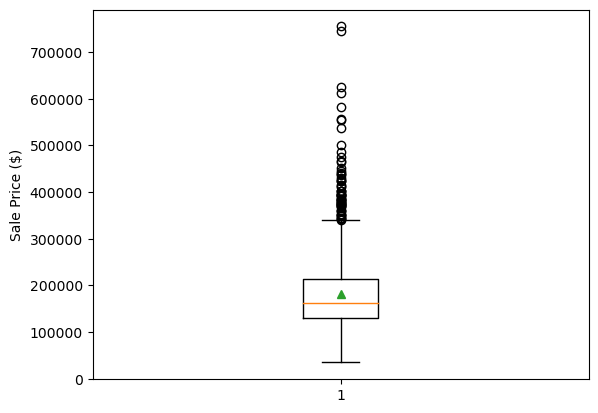

In [20]:
SalePrice = house_df['SalePrice']
plt.boxplot(SalePrice, showmeans=True)
plt.ylabel('Sale Price ($)')
plt.show()

In [21]:
# These outliers are real observations, but those greater than $700000 are going to skew the model so I will remove them

house_df = house_df[house_df.SalePrice < 700_000]

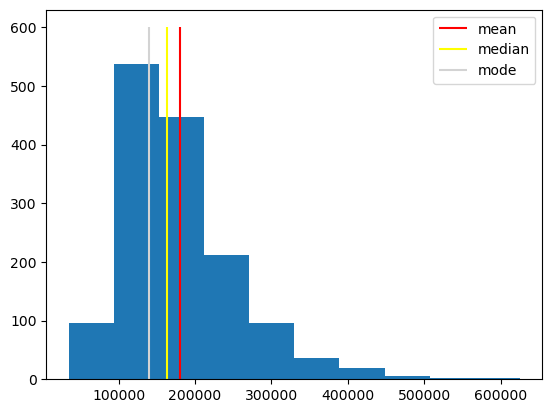

In [22]:
#2 Explore the distribution of the SalePrice column, is it skewed in any way?
SalePrice = house_df['SalePrice']
plt.hist(SalePrice)
plt.vlines(SalePrice.mean(), ymin=0, ymax=600, color='red', label='mean')
plt.vlines(SalePrice.median(), ymin=0, ymax=600,
           color='yellow', label='median')
plt.vlines(SalePrice.mode(), ymin=0, ymax=600, color='lightgrey', label='mode')
plt.legend()
plt.show()
#Positive skew

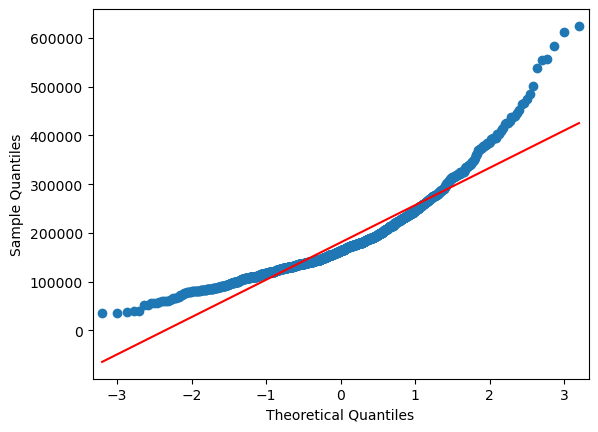

In [23]:
from statsmodels.graphics.gofplots import qqplot
qqplot(SalePrice, line='s')
plt.show()

In [24]:
# D'Agostino's K^2 Test
from scipy.stats import normaltest
stat, p = normaltest(house_df.SalePrice)
print(p)

8.291941080943944e-101


In [25]:
# Null hypothesis: the data is normally distributed
# p-value is less than 0.05, so we reject the null hypothesis

# The data is skewed to the right (mean > median > mode)
# (so we may need to transform it to make it more normal.)

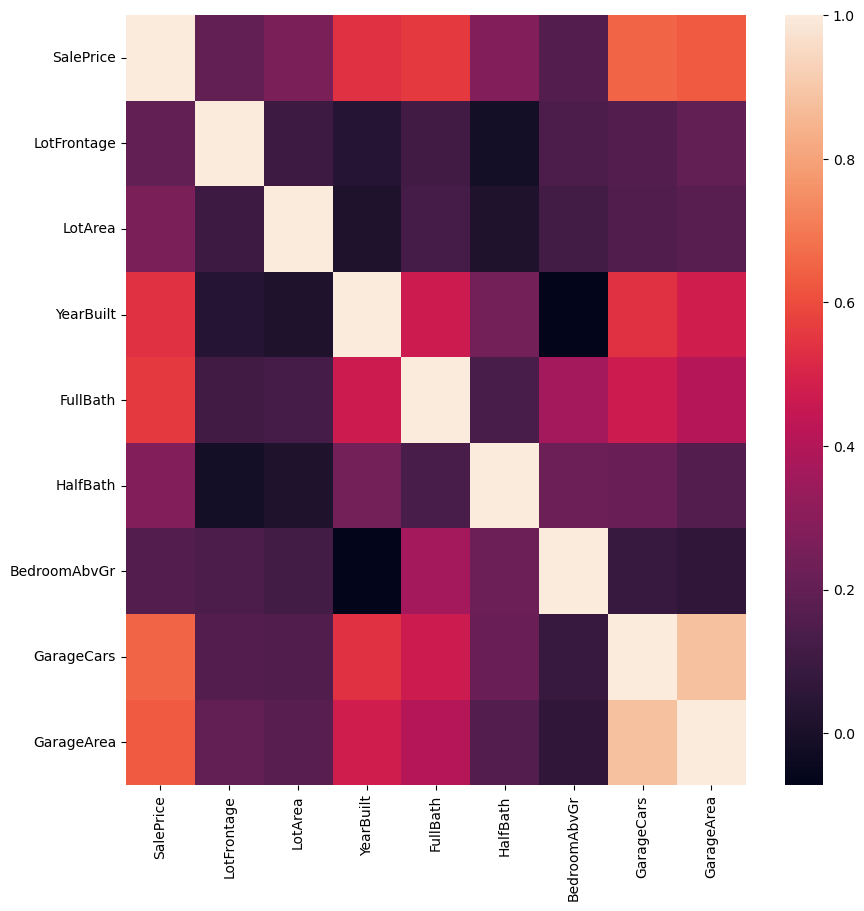

In [27]:
#3 Which feature is most correlated with SalePrice?
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(house_df.corr(numeric_only = True));

In [24]:
# year built, number of full bathrooms and how many cars can be fit into a garage seem most correlated
# As garage area and garage cars are describing the same thing, you should only pick one for your model

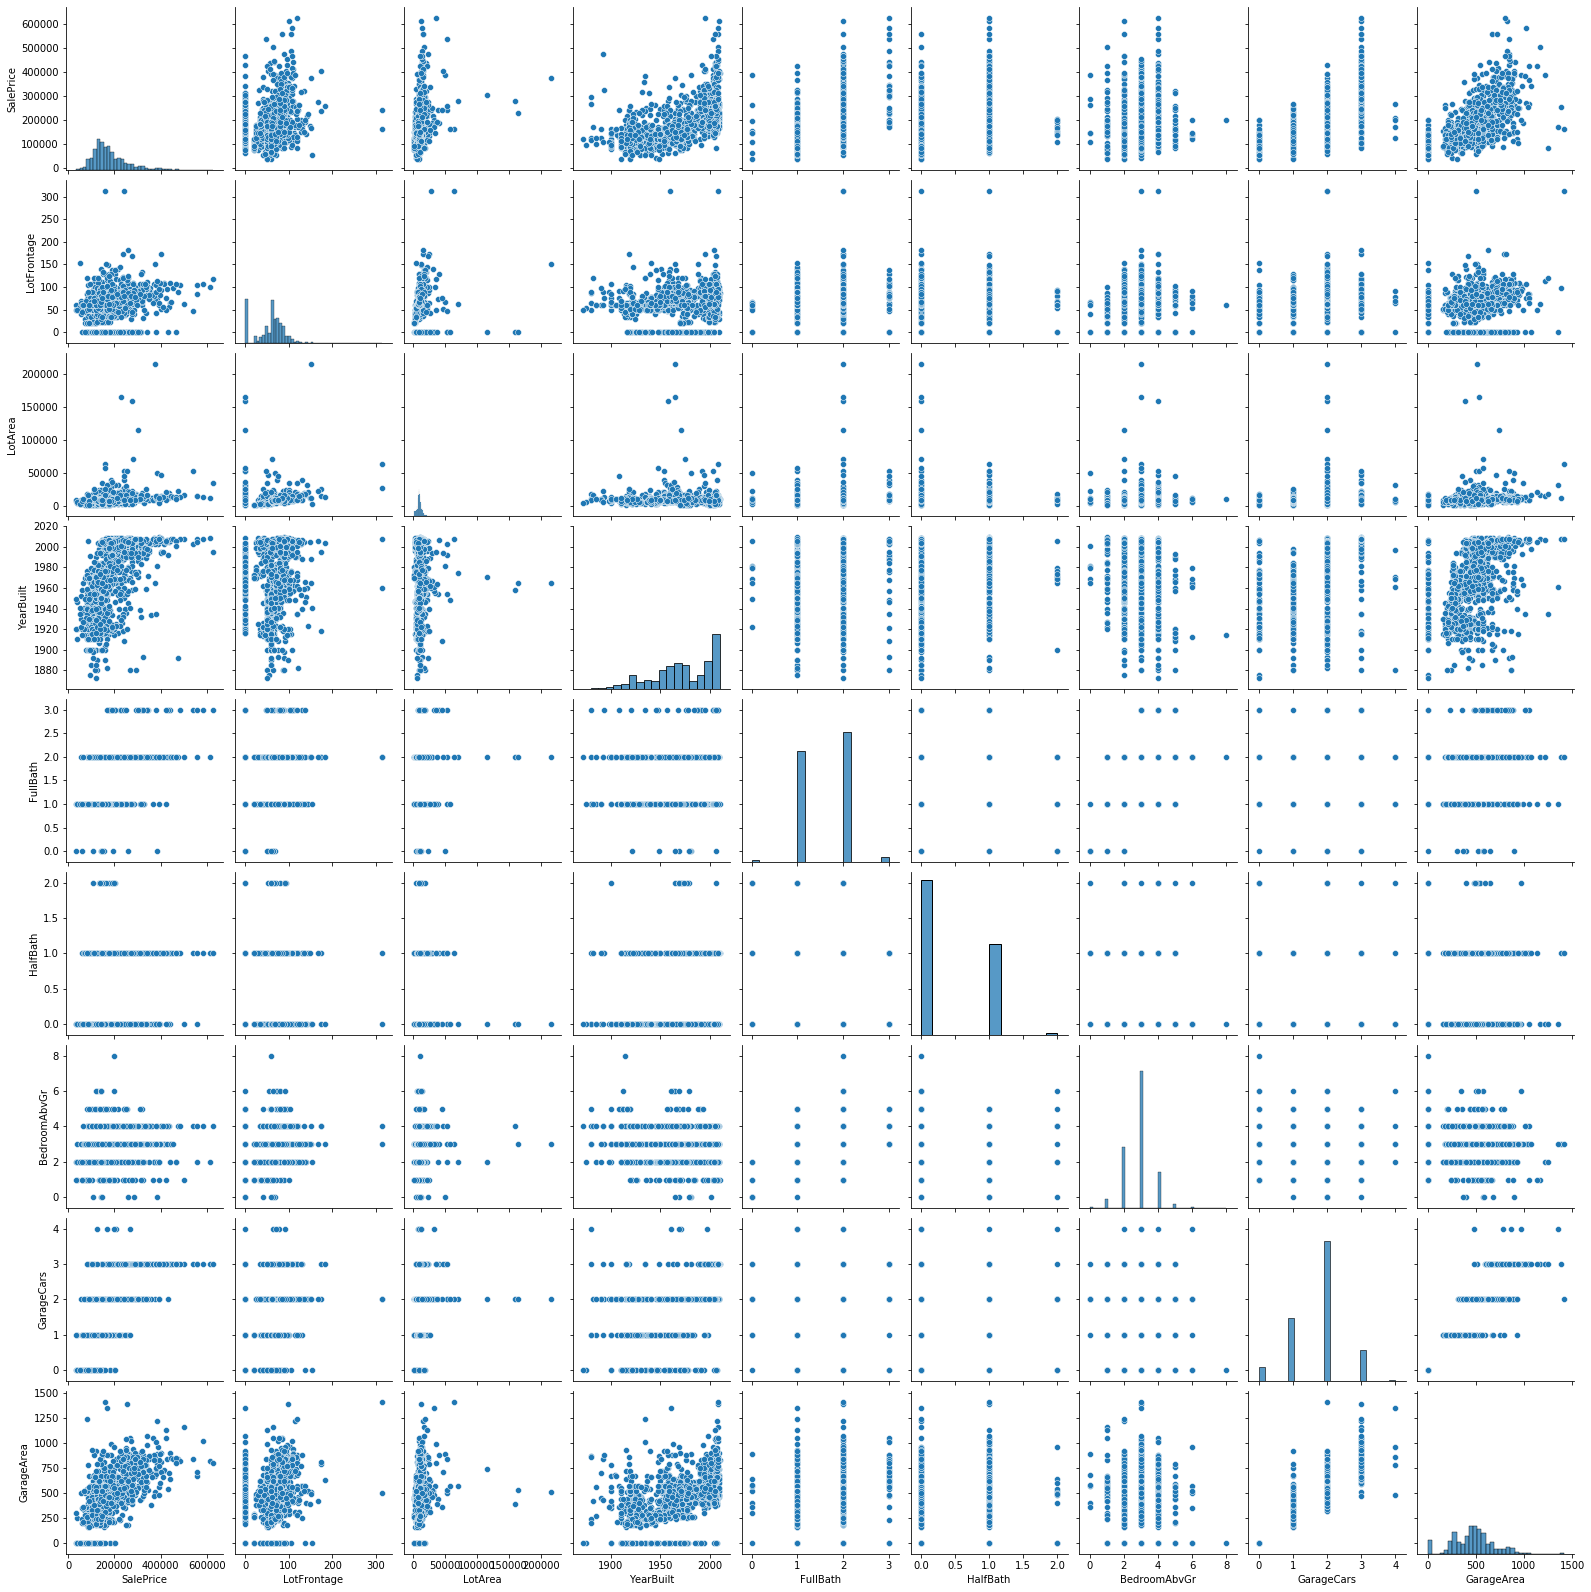

In [25]:
#4 Plot a pairplot to observe the correlation between each feature.
sns.pairplot(house_df)

In [28]:
#5 Transform the Utilities and Neighborhood columns into dummy variables

house_df_dummy=pd.get_dummies(house_df,columns=['Utilities','Neighborhood'],drop_first=True)

In [27]:
#6 Save the dataset as a csv file called house_clean.csv
house_df_dummy.to_csv('house_clean.csv',index=False)